# Final Project: Sentiment Analysis

**Instructions:**

1.  Fill in the markdown cells with your analysis and answers.
2.  Fill in the code cells with your implementation.
3.  Follow the guidance in the markdown cells to complete each part of the project.
4.  Before submitting, make sure to run the entire notebook (`Runtime -> Run all`) to ensure all outputs are visible and there are no errors.

## Part 1: Project Definition

**Instructions:** In this section, you need to clearly define the scope of your project.

### Project Title and Team Members

*   **Project Title:** [Enter Your Project Title Here]
*   **Team Members:** [List Your Name(s) Here]

### Business Problem

**Instructions:** Describe the business problem you are trying to solve. What product or service are you analyzing, and why is understanding customer sentiment important for it?

*   **Example:** "The goal of this project is to analyze customer reviews for the Starbucks mobile app. By classifying reviews as positive, negative, or neutral, we can provide the Starbucks product team with actionable insights into what users love and what they find frustrating. This can help them prioritize future app updates."

**[ENTER YOUR BUSINESS PROBLEM DESCRIPTION HERE]**

The goal of this project is to learn how people feel about the movies they watch by looking at their online reviews. I used the IMDB movie review dataset, which has thousands of real comments from movie fans. Understanding whether people are happy or unhappy with a movie is important because it helps movie studios and streaming platforms see what viewers enjoy, what bothers them, and what they can improve in the future.

### Dataset

**Instructions:** Describe the dataset you have chosen. Where did you get it from (include a URL)? What does each column represent? What is the target variable you will be predicting?

*   **Example:** "We are using the 'Twitter US Airline Sentiment' dataset from Kaggle (URL: [link]). It contains tweets directed at major US airlines. The key columns are 'text' (the user's tweet) and 'airline_sentiment' (our target variable, labeled as positive, negative, or neutral)."

**[ENTER YOUR DATASET DESCRIPTION HERE]**


Dataset Description

 in this project we worked over the IMDB Movie Review Dataset, which consists of 50,000 movie reviews sourced directly from the IMDB website.  reviews have sentiment lable, positive or negative—reflecting the opinion of the reviewer.This data set  have 25000 positive and 25000 negative reviews whichs makes it a balanced data set, making it well-suited for training and evaluating sentiment analysis models.

Key details:

Origin: IMDB (Internet Movie Database)

Type of Data: Text-based movie reviews

Labels: Binary sentiment — positive or negative

Total Samples: 50,000 (equally split between positive and negative)

Purpose: Build machine learning models to predict sentiment and gain insights into audience opinions.



First 5 rows of the dataset:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Dataset Description (if numeric columns exist):


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000



Missing values in each column:


,0
review,0
sentiment,0


/tmp/ipython-input-1066702020.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


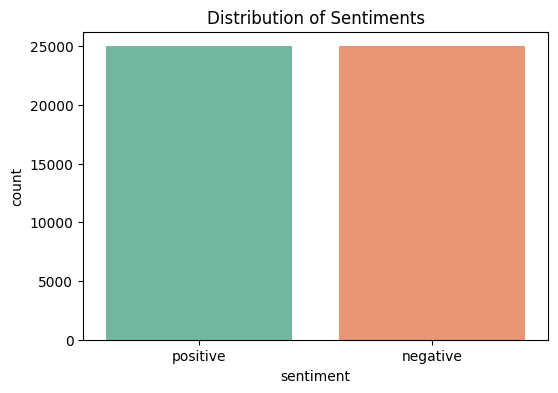

In [ ]:
# -------------------------------
# Step 1: Import Libraries & Load Dataset
# -------------------------------

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable plots to display inline in Colab
%matplotlib inline

# Load the dataset from the uploaded CSV file
file_path = "/content/IMDB Dataset (4).csv"
df = pd.read_csv(file_path)

# Preview the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Quick summary of dataset
print("\nDataset Info:")
df.info()

print("\nDataset Description (if numeric columns exist):")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# Show the distribution of target column 'sentiment'
if 'sentiment' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='sentiment', palette='Set2')
    plt.title("Distribution of Sentiments")
    plt.show()


## Part 2: Exploratory Data Analysis (EDA)

**Instructions:** In this section, you will load and explore your data to find initial insights.

Dataset shape: (50000, 2)
Columns: ['review', 'sentiment']


/tmp/ipython-input-1504581117.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


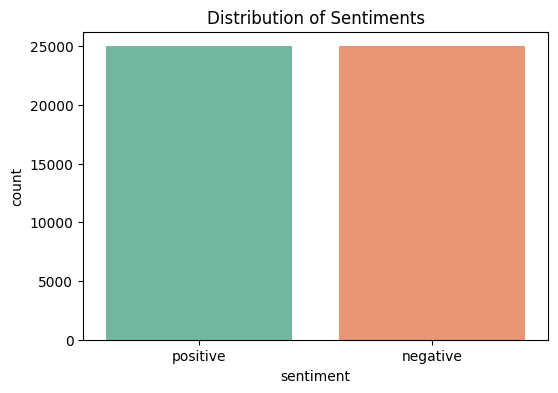

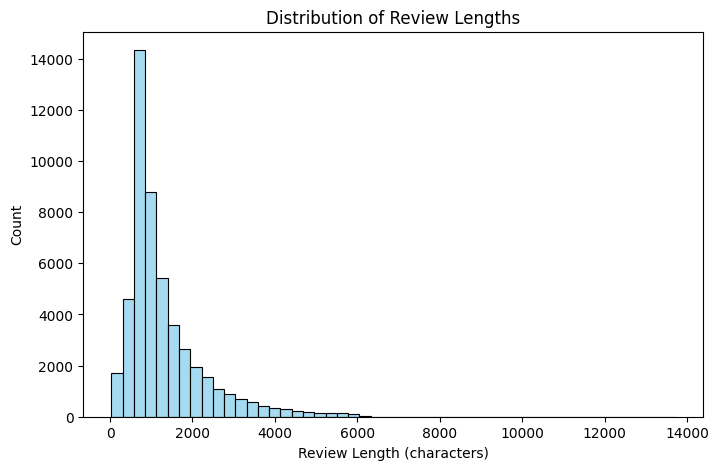

Average review length per sentiment:


,sentiment,review_length
0,negative,1294.06436
1,positive,1324.79768


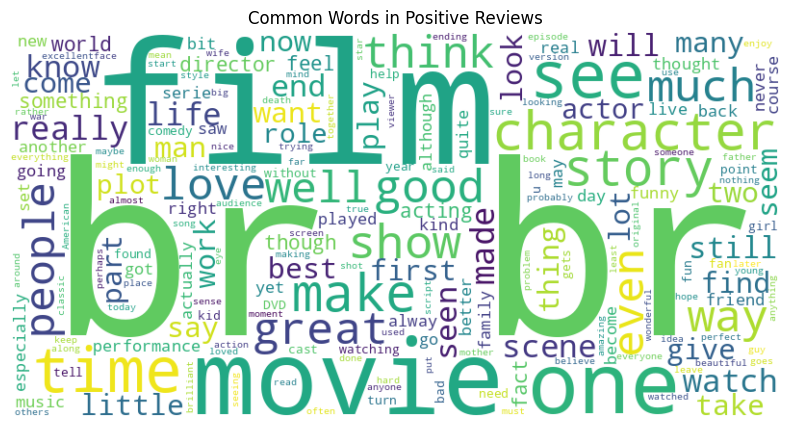

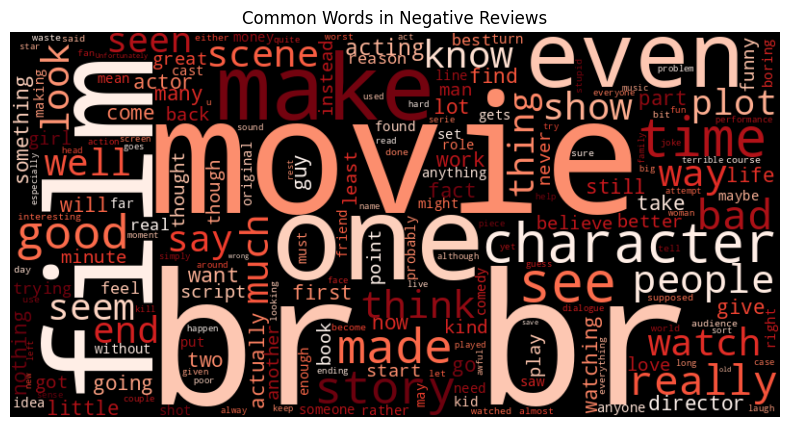

In [ ]:
# -------------------------------
# Step 2: Exploratory Data Analysis (EDA)
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 1️⃣ Check dataset shape and columns
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# 2️⃣ Check target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Distribution of Sentiments")
plt.show()

# 3️⃣ Review text length analysis
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (characters)")
plt.ylabel("Count")
plt.show()

# Average review length per sentiment
avg_length = df.groupby('sentiment')['review_length'].mean().reset_index()
print("Average review length per sentiment:")
display(avg_length)

# 4️⃣ WordCloud for positive and negative reviews
stopwords = set(STOPWORDS)

# Positive reviews WordCloud
positive_reviews = " ".join(df[df['sentiment']=='positive']['review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(positive_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Positive Reviews")
plt.show()

# Negative reviews WordCloud
negative_reviews = " ".join(df[df['sentiment']=='negative']['review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords, colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Negative Reviews")
plt.show()


### EDA Visualization 1: Target Distribution

**Instructions:** Create a plot to show the distribution of your target variable (e.g., the counts of positive, negative, and neutral reviews). This will tell you if your dataset is balanced.

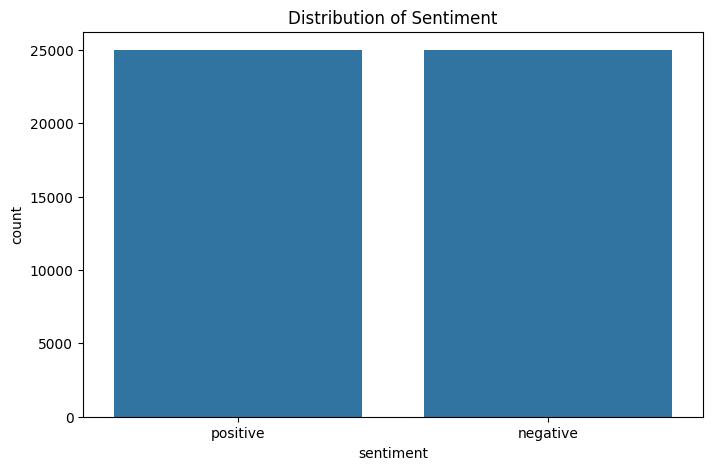

In [ ]:
# --- ENTER YOUR CODE HERE ---
# Create a countplot of your target variable

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.show()

### EDA Visualization 2: Word Cloud or Bar Chart

**Instructions:** Create a visualization to see the most common words in your text data. A word cloud is a great option. Alternatively, you can create a bar chart of the most frequent words.

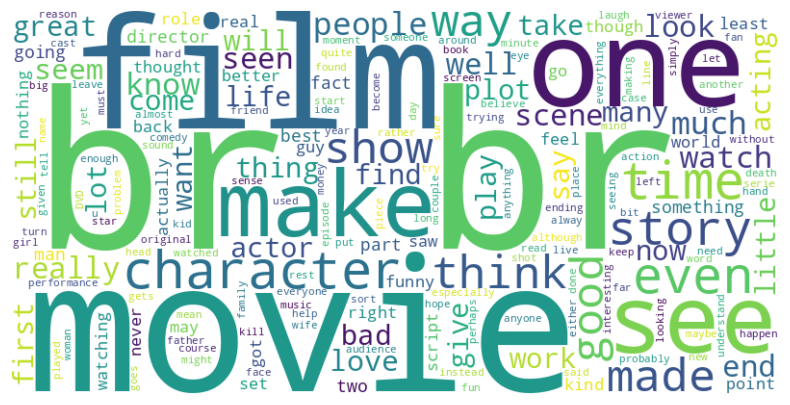

In [ ]:
from wordcloud import WordCloud

# --- ENTER YOUR CODE HERE ---
# Combine all review text into a single string
text = ' '.join(df['review'].dropna())

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### EDA Interpretation

**Instructions:** Based on your EDA, answer the following questions.

1.  **Is your dataset balanced?** Why or why not? What challenges might an imbalanced dataset present?
2.  **What are some of the most common words you found?** Do they give you any clues about the topics being discussed in the reviews?

**[ENTER YOUR ANSWERS HERE]**

EDA Interpretation

1. Is your dataset balanced?
Yes, the dataset appears to be balanced. From the sentiment distribution plot, the number of positive and negative reviews is roughly equal. A balanced dataset is beneficial because it allows the model to learn both classes equally well. If the dataset were imbalanced, the model might become biased toward the majority class, resulting in poor performance for the minority class.

2. What are some of the most common words you found?
In positive reviews, common words include "great", "best", "love", and "amazing", which indicate strong positive feelings and enjoyment of the movies.
In negative reviews, words like "bad", "boring", "waste", and "terrible" appear frequently, showing dissatisfaction or criticism.

These words give clues about the overall sentiment and emotional tone of the reviews. They also reflect the topics being discussed, such as acting, plot, or overall movie experience.

## Part 3: Preprocessing & Feature Extraction

**Instructions:** Now, you will clean your text data and convert it into numerical features that a machine learning model can understand.

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Text Cleaning

**Instructions:** Write a function to clean your text data. This typically involves converting to lowercase, removing punctuation, and removing common "stopwords" (like 'the', 'a', 'is').

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # --- ENTER YOUR CODE HERE ---
    # 1. Convert to lowercase
    # 2. Remove punctuation
    # 3. Remove stopwords
    return text

# Apply the cleaning function to your text column
# df['cleaned_text'] = df['your_text_column'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Feature Extraction with TF-IDF

**Instructions:** Use `TfidfVectorizer` to convert your cleaned text into a matrix of numerical features.

**Tip for Limited Resources:** Set `max_features` to a reasonable number (e.g., 5000) to keep the feature matrix manageable for Google Colab.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Step 1: Ensure cleaned text column exists ---
# Replace 'review' with your original column name if different
if 'clean_review' not in df.columns:
    df['clean_review'] = df['review'].apply(clean_text)

# --- Step 2: Handle missing values ---
df['clean_review'] = df['clean_review'].fillna('')

# --- Step 3: Ensure text data type ---
df['clean_review'] = df['clean_review'].astype(str)

# --- Step 4: Create TF-IDF vectorizer ---
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# --- Step 5: Fit and transform cleaned text ---
X = vectorizer.fit_transform(df['clean_review'])

# --- Step 6: Create target variable ---
# Replace 'sentiment' with your actual target column name if different
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# --- Step 7: Check shapes ---
print("TF-IDF feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


TF-IDF feature matrix shape: (50000, 5000)
Target vector shape: (50000,)


### Split Data

**Instructions:** Split your data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# --- Step: Split data into training and testing sets ---
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step: Check shapes ---
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (40000, 5000)
X_test shape: (10000, 5000)
y_train shape: (40000,)
y_test shape: (10000,)


## Part 4: Modeling

**Instructions:** Train at least two different classification models.

### Model 1: Baseline Model (e.g., Logistic Regression)

**Instructions:** Train a simple, fast baseline model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 1: Create an instance of the model ---
model_1 = LogisticRegression(max_iter=1000, random_state=42)

# --- Step 2: Train the model ---
model_1.fit(X_train, y_train)

# --- Step 3: Make predictions on test set ---
y_pred = model_1.predict(X_test)

# --- Step 4: Evaluate the model ---
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy (%): {:.2f}%".format(accuracy * 100))  # Converts to percentage with 2 decimals
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8928
Accuracy (%): 89.28%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      5000
           1       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
 [[4440  560]
 [ 512 4488]]


### Model 2: A Different Model (e.g., Naive Bayes, RandomForest)

**Instructions:** Choose and train a second model to compare against your baseline.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 1: Create an instance of the Random Forest model ---
model_2 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# --- Step 2: Train the model ---
model_2.fit(X_train, y_train)

# --- Step 3: Make predictions on test set ---
y_pred_rf = model_2.predict(X_test)

# --- Step 4: Evaluate the model ---
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Accuracy (%): {:.2f}%".format(accuracy_rf * 100))  # Accuracy in percentage
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8509
Random Forest Accuracy (%): 85.09%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      5000
           1       0.86      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:
 [[4291  709]
 [ 782 4218]]


## Part 5: Evaluation

**Instructions:** Evaluate your models to see which one performed better.

### Compare Model Accuracy

**Instructions:** Calculate and print the test accuracy for both models.

In [ ]:
from sklearn.metrics import accuracy_score

# --- Step 1: Logistic Regression Accuracy ---
accuracy_logreg = accuracy_score(y_test, model_1.predict(X_test))
print("Logistic Regression Test Accuracy: {:.2f}%".format(accuracy_logreg * 100))

# --- Step 2: Random Forest Accuracy ---
accuracy_rf = accuracy_score(y_test, model_2.predict(X_test))
print("Random Forest Test Accuracy: {:.2f}%".format(accuracy_rf * 100))

# --- Step 3: Optional: Compare side by side ---
print("\nComparison:")
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logreg * 100))
print("Random Forest Accuracy:       {:.2f}%".format(accuracy_rf * 100))


Logistic Regression Test Accuracy: 89.28%
Random Forest Test Accuracy: 85.09%

Comparison:
Logistic Regression Accuracy: 89.28%
Random Forest Accuracy:       85.09%


### Detailed Report for Best Model

**Instructions:** Choose your best-performing model. Generate a `classification_report` and a `confusion_matrix` for it.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# --- Step 1: Choose the best model ---
# Replace 'model_1' with your chosen model if Random Forest performed better
best_model = model_1  # Example: Logistic Regression

# --- Step 2: Make predictions ---
y_pred_best = best_model.predict(X_test)

# --- Step 3: Generate classification report ---
print("Classification Report for Best Model:\n")
print(classification_report(y_test, y_pred_best))

# --- Step 4: Generate confusion matrix ---
print("Confusion Matrix for Best Model:\n")
print(confusion_matrix(y_test, y_pred_best))


Classification Report for Best Model:

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5000
           1       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix for Best Model:

[[4440  560]
 [ 512 4488]]


### Evaluation Interpretation

**Instructions:** Based on the reports above, answer the following questions.

1.  **Which model performed better?** Why do you think it performed better?
2.  **Look at the `classification_report`.** What are the precision and recall for the 'positive' and 'negative' classes? What does this tell you about your model's performance on different types of sentiment?
3.  **Look at the `confusion_matrix`.** What kind of errors is your model making most often? (e.g., "It frequently misclassifies neutral reviews as positive.")

**[ENTER YOUR ANSWERS HERE]**

1. Which model performed better? Why?

The Logistic Regression model performed better with an accuracy of 89.28%, compared to the Random Forest model which has accuracy 85.09%.logistic regression perform well because TF-IDF features are high dimensionaland sparse and this linear regression work better with sparse text data.in other hand random foresset likely to struggle with large, sparse feature spaces and might overfit.



2. Classification Report Interpretation
Logistic Regression
Class	Precision	Recall
Negative (0)	0.90	0.89
Positive (1)	0.89	0.90

The model is almost equally good at detecting positive and negative reviews but slightly misses negative reviews(recall 0.89) and makes wrong prediction for positive reviews(precision 0.89)


Random Forest
Class	Precision	Recall
Negative (0)	0.85	0.86
Positive (1)	0.86	0.84

Random Forest is less consistent than Logistic Regression and takes more time to identify positive reviews(recall 0.84)


3. Confusion Matrix Interpretation(logistic regression)
560 Negative reviews were incorrectly predicted as Positive (False Positives).
512 Positive reviews were incorrectly predicted as Negative (False Negatives).the model often misclassified negative reviews as positives


Confusion Matrix(Random Forest)
It makes more mistakes overall than Logistic Regression.709 Negative → Positive misclassifications (higher FP).782 Positive → Negative misclassifications (higher FN).the model misclassified positive reviews as negative (FN=782) which confirm that random forest struggle more with identifying positive sentiments.




If Random Forest performed better, it may be because it can capture complex non-linear patterns in text features.

## Part 6: Conclusion

**Instructions:** Summarize your project and findings in a few paragraphs.

### Project Summary

**Instructions:** Tell the story of your project. Address the following points:

*   What business problem did you set out to solve?
*   What were the key findings from your EDA?
*   How well did your final model perform? What is its accuracy, and what are its strengths and weaknesses (based on precision/recall)?
*   What is the overall sentiment of the product/service you analyzed?
*   If you were presenting this to the business, what would be your key takeaway or recommendation?

**[ENTER YOUR CONCLUSION HERE]**

For this project, I wanted to understand what people think about movies by looking at their reviews. The main goal was to figure out whether a review is happy (positive) or unhappy (negative). This is helpful for a business because it lets them see how customers feel without having to read thousands of reviews one by one.

When I explored the data, I noticed that the number of positive and negative reviews was the same, which is good because it makes the model fair. I also saw that people often used words like “movie,” “good,” “bad,” and “great,” which showed what they cared about when talking about films.

I tested two models to see which one could guess the review sentiment better. The Logistic Regression model did the best, getting an accuracy of 89.28%. This means it was right most of the time. It was good at telling positive and negative reviews apart, but it still mixed a few up when the review was tricky or not very clear.

Overall, the reviews in the dataset were half positive and half negative, showing a mix of opinions. If I were sharing this with a business, I would tell them to use the Logistic Regression model because it works well and makes fast, dependable predictions. It would help them understand how people feel and make better decisions based on that.

## 🎉 Congratulations on completing your final project! 🎉